In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install pyod


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     --------- ------------------------------ 41.0/165.8 kB ? eta -:--:--
     --------- ------------------------------ 41.0/165.8 kB ? eta -:--:--
     --------- ------------------------------ 41.0/165.8 kB ? eta -:--:--
     --------- ------------------------------ 41.0/165.8 kB ? eta -:--:--
     --------- ------------------------------ 4


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, median_abs_deviation
from pyod.models.mad import MAD

In [55]:
df = np.random.randint(50, 75, 25)
df = pd.DataFrame(df)
df.head()

,0
0,66
1,58
2,69
3,57
4,71


In [56]:
df.describe()

,0
count,25.00000
mean,61.20000
std,7.28011
min,51.00000
25%,56.00000
50%,61.00000
75%,67.00000
max,73.00000


In [57]:
df.iloc[9,0]=123
df.tail()

,0
20,52
21,71
22,61
23,61
24,57


# Summary Description

In [58]:
df.describe()

,0
count,25.000000
mean,63.960000
std,14.214078
min,51.000000
25%,56.000000
50%,61.000000
75%,69.000000
max,123.000000


# Histogram

In [59]:
n_bins = int(np.sqrt(len(df)))

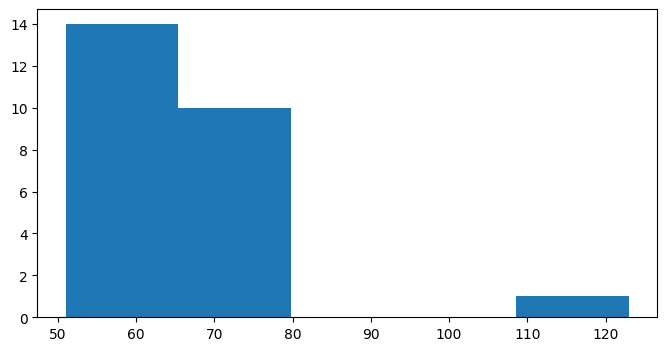

In [60]:
plt.figure(figsize=(8, 4))
plt.hist(df, bins=n_bins)
plt.show()

# Scatter Plot

In [61]:
integers=range(len(df))

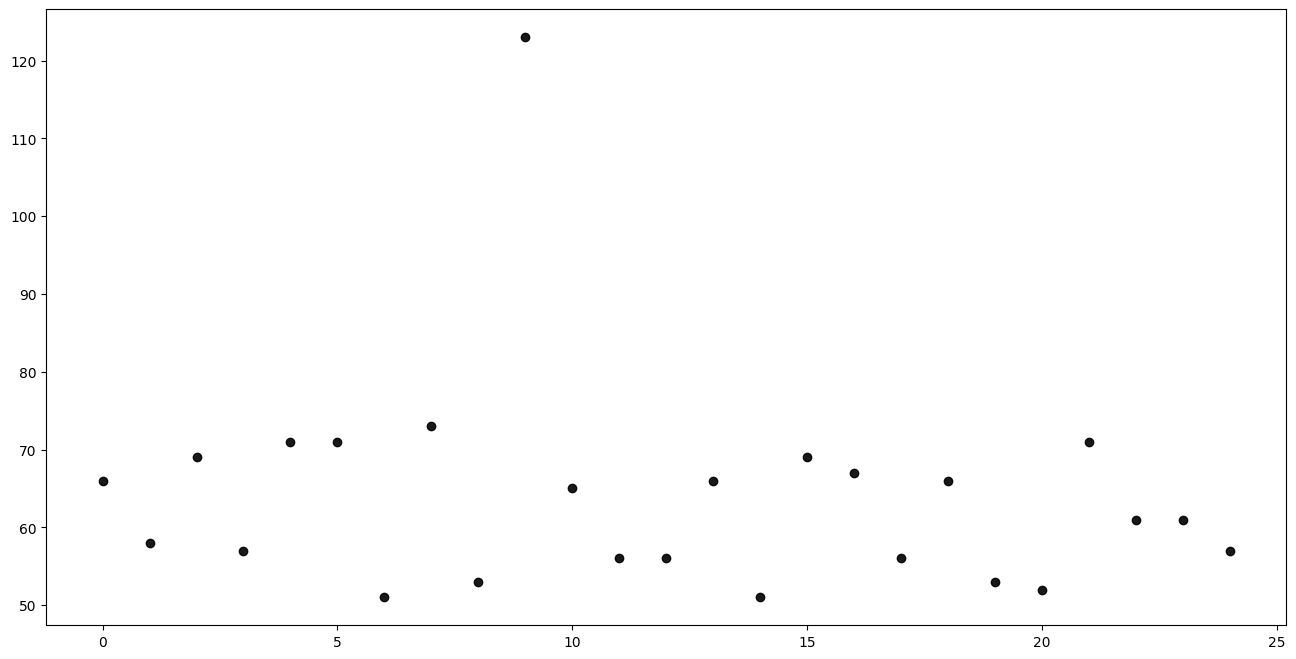

In [66]:
plt.figure(figsize=(16,8))
plt.scatter(integers, df, c='black', alpha=0.9)
plt.show()

# BoxPlot

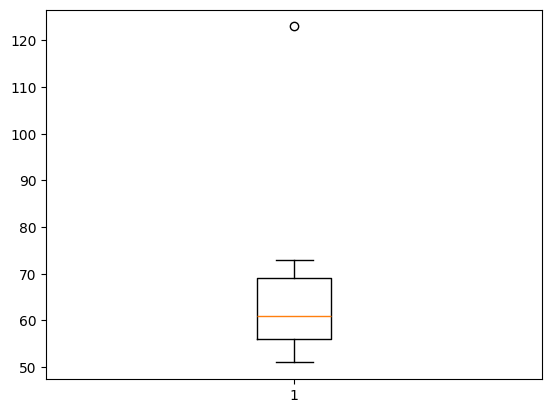

In [68]:
plt.boxplot(df, whis=3.5)
plt.show()

# Using Inter-Quartile Range

In [74]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

print(q1)
print(q3)

0    56.0
Name: 0.25, dtype: float64
0    69.0
Name: 0.75, dtype: float64


In [75]:
IQR = q3-q1
factor=2.5
print(IQR)

0    13.0
dtype: float64


In [71]:
lower_limit = q1 - (IQR*factor)
upper_limit = q3 + (IQR*factor)

In [76]:
is_lower = df<lower_limit
is_higher = df>upper_limit
outliers = df[is_higher | is_lower]
print(outliers)

        0
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9   123.0
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN


# Detection through Z-score

In [79]:
scores = zscore(df)
is_over_3 = np.abs(scores) > 3
outliers = df[is_over_3]
print(outliers)

        0
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9   123.0
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN


# Mean-Absolute-Deviation (MAD)

In [84]:
mad_score = median_abs_deviation(df)
mad=MAD(threshold=3.5)
df_reshaped = df.values.reshape(-1, 1)
labels = mad.fit_predict(df_reshaped)
outliers = df[labels==1]
print(len(outliers))
print(outliers)

1
     0
9  123


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
